In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import seaborn as sns
from sympy import *
import math


import warnings

# Configuration
warnings.simplefilter('ignore')
pd.set_option('max_column', None)
sns.set_style("darkgrid")
colors = sns.color_palette('Set2')

In [2]:
def nominal_interest_rate(e, m):
    n = m*((1 + e)**(1/m) - 1)
    return n

def nominal_interest_rate_continuous(r):
    n = np.log(r + 1)
    return n
    

def present_value(FV, r, n):
    PV = FV/(1+r/100)**n
    return PV


'''
FV = Future Value
r = Interest Rate
n = Number of Periods
'''

def present_value_annuity_due(p, r, n):
#     C + C*[1-(1+i)^-(n-1)]/i]
    pv_a = p + p*(1-(1+r)**((-1)*(n-1)))/r
    return pv_a

'''
C= Cash Flow per period
r = interest rate per period
n =number of period
'''

def annuities_perpetual(p,r,n):
    A = (r*(1+r)**n*(p))/((1+r)**n -1)
    return A 

def pv_perpetual(A, r, n):
    p = A/r*(1-(1/(1+r)**n))
    return p

def irr(r, li):
    irr = np.irr(r, li)
    return irr



# Bond price and yield to maturity
def bond_price(F, lam, m, n, C):
    p = (F/((1+lam/m)**n)) + C/lam*(1-(1/(1+(lam/m))**n))
    return n


# face_value = 10000
# market_price = 9000
# n = 4
# coupon_payment = 0.05 * 10000
def ytm(face_value, market_price, n, coupon_payment):
    ytm = ((coupon_payment + (face_value-market_price)/ n)) / ((face_value + market_price)/2)
    return ("The YTM for this bond is: " + str(ytm*100) + "%")

'''
n: period
C: yearly coupon payment
F: face value
m: # of coupon payments(C) per year
P: current price of the bond
lam(lambda): yield of maturity
'''
def Macaulay_duration(c, y, m, n):
    D = ((1+y)/m*y) - (1+y+n*(c-y)/m*c*((1+y)**n-1)+ m*y)
    return D


### Q

If the spot rates for 1 and 2 years are

s1 = 2.3% 

s2 = 2.9%

What is the forward rate f1,2 ?

Please express your answer in percentage, not decimal form, and round your numerical answer to one decimal place.

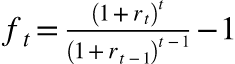

In [26]:
s1 = 0.023
s2 = 0.029
f = ((1+s2)**2 / (1+s1)** (2-1))-1
print("f1-2 is :", f)

f1-2 is : 0.03503519061583571


### Q

Recall the expectations theory asserts that the current implied forward rates for 1 year ahead---that is, the forward rates from year 1 to future dates---are good estimates of next year's spot rates. 

Given the current yearly spot rate curve

s = (5.3%, 5.6%, 5.9%, 6.2%, 6.5%, 6.8%)

Find a good estimate for the spot rate curve for next year, assuming the expectations theory is true.

In [25]:
maturity = [i for i in range(1,7)]
spot = [0.053, 0.056, 0.059, 0.062, 0.065, 0.068]
new_list = [maturity, spot]

df = pd.DataFrame(new_list).transpose()
df.columns = ['maturity', 'spot_r']
df

# (5.90%, 6.20%, 6.50%, 6.80%, 7.10%) 

,maturity,spot_r
0,1.0,0.053
1,2.0,0.056
2,3.0,0.059
3,4.0,0.062
4,5.0,0.065
5,6.0,0.068


### Q


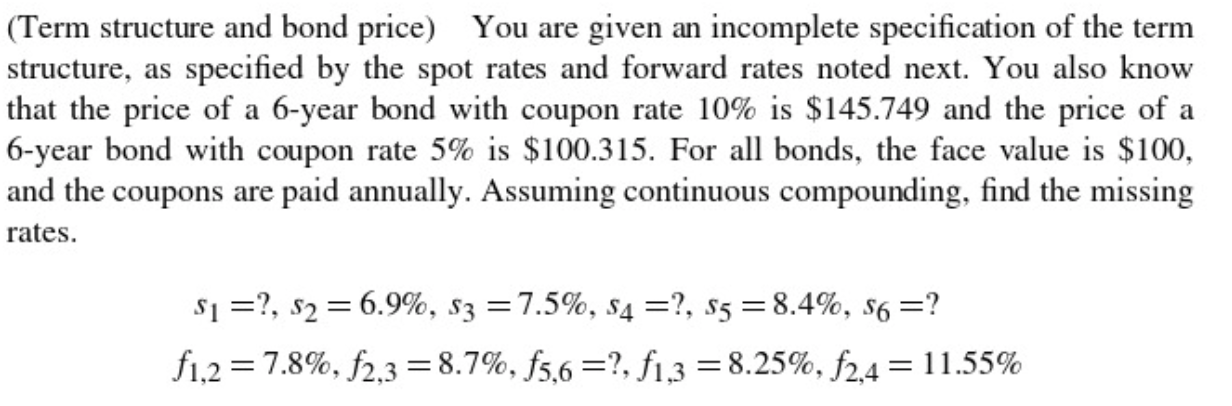
What is the spot rate s1 ?

Please express your numerical answer as a percentage, not a decimal, and round your answer to the nearest integer.

'''

exp(s1*1) *exp(f1,2*1) = exp(s2*2)

=> s1 = s2*2-f1,2 =0.069*2-0.078 = 0.06 or 6.00%

Similarly

exp(s2*2) *exp(f2,4*2) = exp(s4*4)

s4= (s2*2+f2,4*2)/4 = (6.90%*2+11.55%*2)/4 = 0.9225 or 9.225%

For six year bond of coupon rate 10%

10*exp(-s1*1)+10*exp(-s2*2)+10*exp(-s3*3)+10*exp(-s4*4)+10*exp(-s5*5)+10*exp(-s6*6)+100*exp(-s6*6) = 145.749............................ (1)

For six year bond of coupon rate 5%

5*exp(-s1*1)+5*exp(-s2*2)+5*exp(-s3*3)+5*exp(-s4*4)+5*exp(-s5*5)+5*exp(-s6*6)+100*exp(-s6*6) = 100.315.....(2)

Equation (2) *2 - equation (1)

=> 200*exp(-s6*6) - 100*exp(-s6*6)= 2*100.315-145.749

=> 100*exp(-s6*6) = 54.881

s6= 1/6*ln(1.8221242) = 0.1000 or 10.00%

f5,6 = s6*6-s5*5 =0.1*6 -0.084*5 = 0.1800 or 18.00%

'''

### Q

### Q

### Q

### Q

In lecture we defined quasi-modified duration as the extension of the concept of duration to the term structure framework.

It is possible to extend the process of immunization to the term structure framework. A portfolio of bonds  designed to fund a stream of obligations can be immunized against a parallel shift in the spot rate curve by matching both the present values and the quasi-modified durations of the bonds and the obligations.

Consider the following stream of obligations, in dollars, over the next 8 years as shown in the table below below:

Year	1	2	3	4	5	6	7	8
100	200	300	400	500	600	700	800
You are given the spot rate curve is as follows:



Find a portfolio, consisting of the two bonds below, that has the same present value as the obligation stream and is immunized against an additive shift in the spot rate curve:

Bond 1 is a 12-year 6% annual coupon bond with a price of 65.95

Bond 2 is a 5-year 10% annual coupon bond with a price of 101.67

Both bonds have a face value of $100.  How many units of Bond 2 should be held in the immunized portfolio?  

Please round your numerical answer to the nearest integer number of units.

In [55]:
year = [1,2,3,4,5,6,7,8,9,10,11,12]
s = [7.67, 8.27, 8.81, 9.31, 9.75,10.16 ,10.52 ,10.85 ,11.15 ,11.42, 11.67, 11.89]
spot_r = [i/100 for i in s]
obligations = [i*100 for i in range(1,13)]

#bond1
bond1 = [6,6,6,6,6,6,6,6,6,6,6,65.95+6]
bond2 = [10,10,10,10,101.67+10]

new_list = [year, spot_r, obligations, bond1, bond2]
df = pd.DataFrame(new_list).transpose()
df.columns = ['year','spot_r', 'obligations', 'bond1', 'bond2']
df["discount_r"] = 1 / (1 + df["spot_r"])**df["year"]

# bond1
df["PV1"] = df["bond1"] * df["discount_r"]
bond1_p = sum(df["PV1"])

df['pv_prime1'] = df["bond1"] * df["year"] * (1+df["spot_r"]) ** [(-1)*i for i in df["year"]+1]
quasiD = sum(df['pv_prime1']) / sum(df["PV1"])

# bond2

df["PV2"] = df["bond2"] * df["discount_r"]
df['pv_prime2'] = df["bond2"] * df["year"] * (1+df["spot_r"]) ** [(-1)*i for i in df["year"]+1]

quasiD2 = df['pv_prime2'].sum() / df["PV2"].sum()
bond2_p = df["PV2"].sum()


# obligation

df["PV_ob"] = df["obligations"] * df["discount_r"]
df['pv_prime_ob'] = df["obligations"] * df["year"] * (1+df["spot_r"]) ** [(-1)*i for i in df["year"]+1]

ob_pv = df["PV2"].sum()

quasiDob = df['pv_prime_ob'].sum() / df["PV_ob"].sum()



print("present value of bond 1 is : ", bond1_p)
print("present value of bond 2 is : ", bond2_p)
print("quasi duration of bond 1 is : ", quasiD)
print("quasi duration of bond 2 is : ", quasiD2)
print("quasi duration of the obligattion is : ", quasiDob)
print("present value of the obligation is : ",ob_pv)

present value of bond 1 is :  57.107963789657575
present value of bond 2 is :  102.71652634073213
quasi duration of bond 1 is :  6.4991764843849555
quasi duration of bond 2 is :  3.8058405279046874
quasi duration of the obligattion is :  6.516397105850892
present value of the obligation is :  102.71652634073213


In [56]:
df

,year,spot_r,obligations,bond1,bond2,discount_r,PV1,pv_prime1,PV2,pv_prime2,PV_ob,pv_prime_ob
0,1.0,0.0767,100.0,6.00,10.00,0.928764,5.572583,5.175613,9.287638,8.626022,92.876382,86.260222
1,2.0,0.0827,200.0,6.00,10.00,0.853068,5.118409,9.454898,8.530681,15.758163,170.613630,315.163258
2,3.0,0.0881,300.0,6.00,10.00,0.776236,4.657414,12.840953,7.762356,21.401589,232.870687,642.047661
3,4.0,0.0931,400.0,6.00,10.00,0.700423,4.202538,15.378422,7.004230,25.630703,280.169216,1025.228124
4,5.0,0.0975,500.0,6.00,111.67,0.628026,3.768154,17.166987,70.131620,319.506242,314.012806,1430.582260
5,6.0,0.1016,600.0,6.00,NaN,0.559573,3.357436,18.286686,NaN,NaN,335.743557,1828.668610
6,7.0,0.1052,700.0,6.00,NaN,0.496494,2.978963,18.867844,NaN,NaN,347.545689,2201.248485
7,8.0,0.1085,800.0,6.00,NaN,0.438646,2.631877,18.994154,NaN,NaN,350.917000,2532.553899
8,9.0,0.1115,900.0,6.00,NaN,0.386202,2.317213,18.762862,NaN,NaN,347.582023,2814.429333
9,10.0,0.1142,1000.0,6.00,NaN,0.339132,2.034791,18.262346,NaN,NaN,339.131756,3043.724251


In [57]:
a = np.array([[bond1_p, bond2_p], [bond1_p*quasiD, bond2_p*quasiD2]])
b = np.array([df["PV_ob"].sum(), df["PV_ob"].sum()*quasiDob])
x = np.linalg.solve(a,b)
print("Linear combination of x1 and x2 after immulization is : ", x)

Linear combination of x1 and x2 after immulization is :  [60.79431804 -0.21473839]
